In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pittsburgh Police Arrest Data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66485 entries, 0 to 66484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    66485 non-null  int64  
 1   PK                     66485 non-null  int64  
 2   CCR                    66485 non-null  int64  
 3   AGE                    66078 non-null  float64
 4   GENDER                 66485 non-null  object 
 5   RACE                   66485 non-null  object 
 6   ARRESTTIME             66485 non-null  object 
 7   ARRESTLOCATION         66485 non-null  object 
 8   OFFENSES               66482 non-null  object 
 9   INCIDENTLOCATION       66485 non-null  object 
 10  INCIDENTNEIGHBORHOOD   63996 non-null  object 
 11  INCIDENTZONE           66381 non-null  object 
 12  INCIDENTTRACT          64019 non-null  float64
 13  COUNCIL_DISTRICT       56255 non-null  float64
 14  PUBLIC_WORKS_DIVISION  56255 non-null  float64
 15  X 

In [4]:
df_clean = df.dropna(subset=['OFFENSES', 'INCIDENTNEIGHBORHOOD', 'ARRESTTIME'])
df_clean['ARRESTTIME'] = pd.to_datetime(df_clean['ARRESTTIME'], errors='coerce')

df_reduced = df_clean[['OFFENSES', 'INCIDENTNEIGHBORHOOD', 'ARRESTTIME']]
df_reduced['ARRESTTIME'] = df_reduced['ARRESTTIME'].dt.year

print(df_reduced.head())

                                            OFFENSES INCIDENTNEIGHBORHOOD  \
0                                 3929 Retail Theft.           Bloomfield   
1       13(a)(16) Possession of Controlled Substance         Outside City   
2                                 3929 Retail Theft.             Westwood   
3  5503 Disorderly Conduct. / 5505 Public Drunken...       East Allegheny   
4  2702 Aggravated Assault. / 2705 Recklessy Enda...      Crafton Heights   

   ARRESTTIME  
0        2016  
1        2016  
2        2016  
3        2016  
4        2016  


/scratch/slurm-12787/ipykernel_16873/838295552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ARRESTTIME'] = pd.to_datetime(df_clean['ARRESTTIME'], errors='coerce')
/scratch/slurm-12787/ipykernel_16873/838295552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['ARRESTTIME'] = df_reduced['ARRESTTIME'].dt.year


In [5]:
neighborhood_counts = df_reduced.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='ArrestCount')
neighborhood_counts = neighborhood_counts.sort_values('ArrestCount', ascending=False)

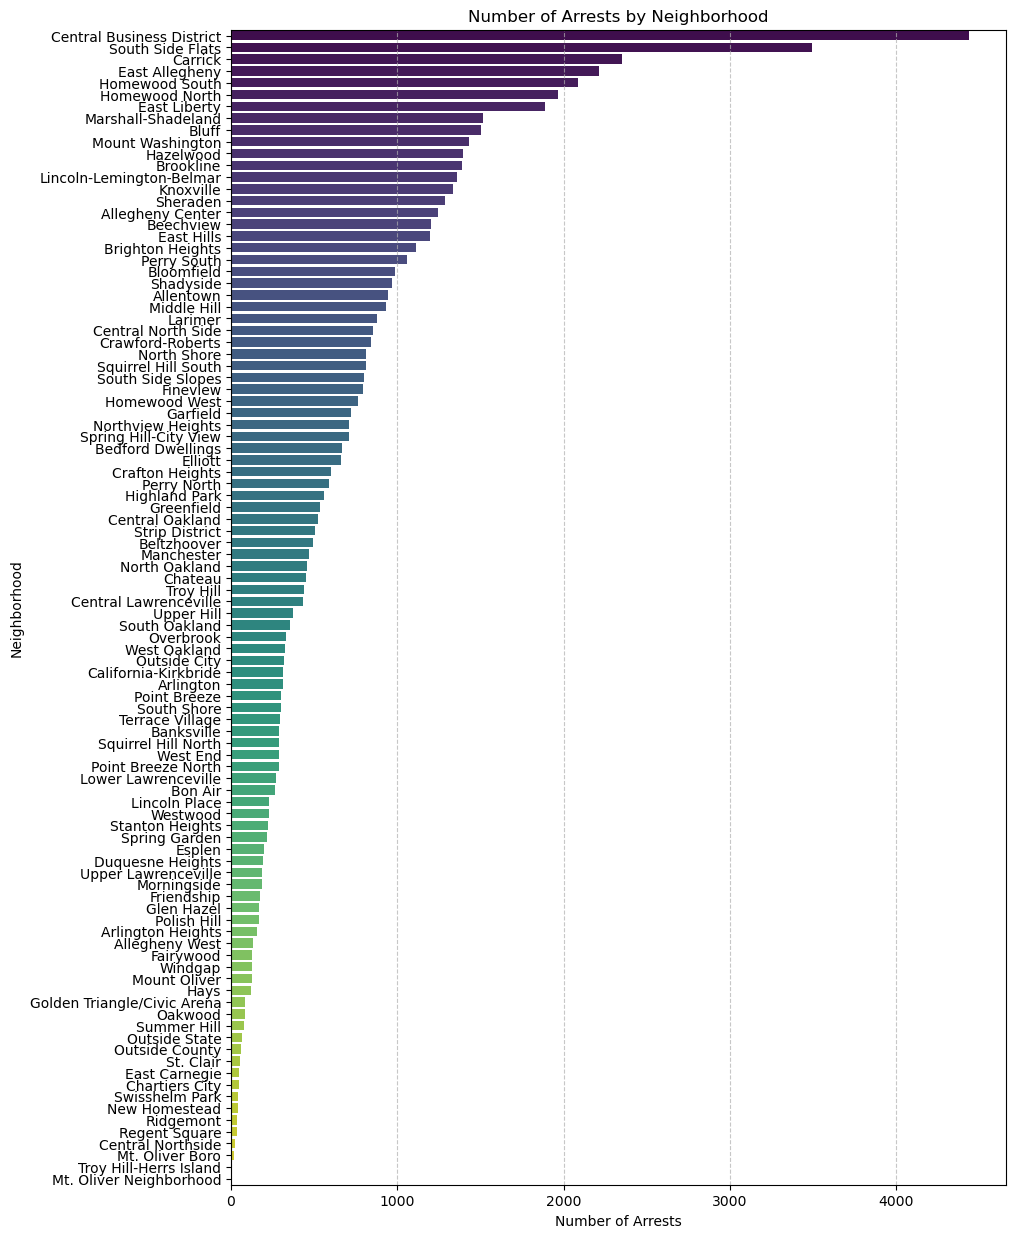

In [6]:
plt.figure(figsize=(10, 15))
sns.barplot(data=neighborhood_counts, y='INCIDENTNEIGHBORHOOD', x='ArrestCount', palette='viridis')
plt.title("Number of Arrests by Neighborhood")
plt.xlabel("Number of Arrests")
plt.ylabel("Neighborhood")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [7]:
print(df_reduced['ARRESTTIME'].unique())

[2016 2015 2017 2014 2008 2011 2007 2018 2013 2012 2019 2020 1998 2021
 2010 2022 2009 2023]


In [8]:
df_reduced['ARRESTTIME'].value_counts().sort_index()

ARRESTTIME
1998        1
2007        3
2008        1
2009        1
2010        3
2011        3
2012        2
2013        3
2014       18
2015       17
2016     4013
2017    11714
2018    10487
2019    10318
2020     7642
2021     7157
2022     6444
2023     6166
Name: count, dtype: int64

In [9]:
years_to_remove = [1998, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
df_reduced = df_reduced[~df_reduced['ARRESTTIME'].isin(years_to_remove)]
yearly_counts = df_reduced.groupby('ARRESTTIME').size().reset_index(name='ArrestCount')

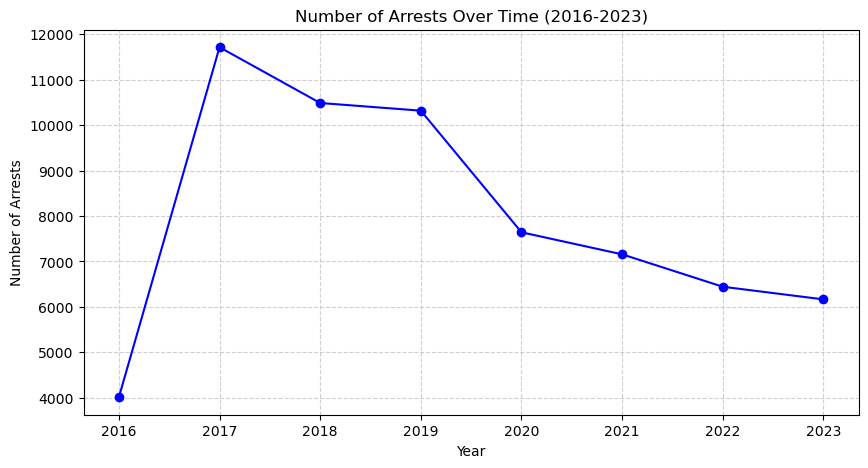

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_counts['ARRESTTIME'], yearly_counts['ArrestCount'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests Over Time (2016-2023)')
plt.xticks(yearly_counts['ARRESTTIME'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [11]:
selected_hoods = ["New Homestead", "Glen Hazel", "Hays", "Oakwood", "Fairywood", "Westwood", "Swisshelm Park", "Summer Hill", "East Carnegie", "St. Clair"]
df_selected = df_reduced[df_reduced['INCIDENTNEIGHBORHOOD'].isin(selected_hoods)]
pivot = df_selected.groupby(['ARRESTTIME', 'INCIDENTNEIGHBORHOOD']).size().unstack()

<Figure size 1200x800 with 0 Axes>

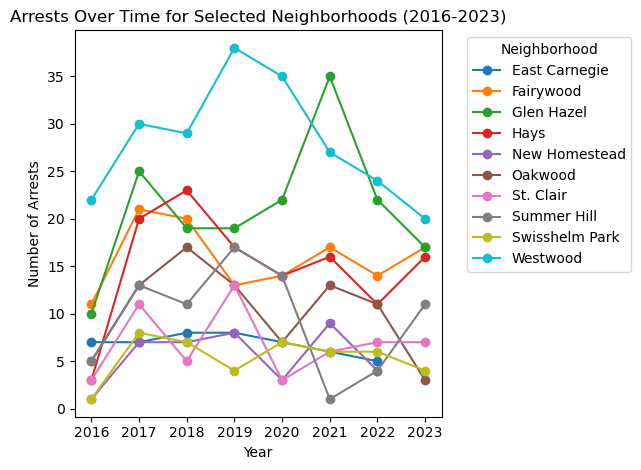

In [12]:
plt.figure(figsize=(12,8))
pivot.plot(marker='o')
plt.title('Arrests Over Time for Selected Neighborhoods (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.xticks(pivot.index)
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [13]:
all_offenses = df_reduced['OFFENSES'].unique()
print(all_offenses)

['3929 Retail Theft.' '13(a)(16) Possession of Controlled Substance'
 '5503 Disorderly Conduct. / 5505 Public Drunkenness' ...
 "5121 Escape. / 1311 Registration Card to be Signed and Exhibited on Demand. / 1511 Carrying and Exhibiting Driver's License on Demand. / 1784 Proof of Financial Responsibility Following Violation. / 3112 Traffic-Control Signals. / 3301 Driving on Right Side of Roadway. / 3305 Limitations on Overtaking on the Left. / 3311 Driving on Divided Highways. / 3733 Fleeing or Attempting to Elude Police Officer"
 '3304 Criminal Mischief. / 3502 Burglary. / 3921 Theft by Unlawful Taking or Disposition. / 5503 Disorderly Conduct.'
 '5104 Resisting Arrest or Other Law Enforcement. / 2701(a)(1) Simple Assault - Intent., Know., Reckless.Cause Bod. Injury / 5503(a)(2) DISORDERLY CONDUCT - UNREASONABLE NOISE']


In [15]:
df_selected = df_reduced[df_reduced['INCIDENTNEIGHBORHOOD'].isin(selected_hoods)]
offense_counts_selected = df_selected.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='Count')

idx = offense_counts_selected.groupby('INCIDENTNEIGHBORHOOD')['Count'].idxmax()
top_offense_per_selected = offense_counts_selected.loc[idx].reset_index(drop=True)

print(top_offense_per_selected)

  INCIDENTNEIGHBORHOOD                                           OFFENSES  \
0        East Carnegie                               2701 Simple Assault.   
1            Fairywood                               2701 Simple Assault.   
2           Glen Hazel                               2701 Simple Assault.   
3                 Hays                               2701 Simple Assault.   
4        New Homestead                               2701 Simple Assault.   
5              Oakwood                               2701 Simple Assault.   
6            St. Clair                               2701 Simple Assault.   
7          Summer Hill                               2701 Simple Assault.   
8       Swisshelm Park  2701(a)(1) Simple Assault - Intent., Know., Re...   
9             Westwood                               2701 Simple Assault.   

   Count  
0      6  
1     19  
2     20  
3     10  
4      4  
5      8  
6      6  
7      5  
8      4  
9     21  
